# Simple linear regression

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the data in

In [69]:
df = pd.read_csv("FuelConsumptionCo2.csv", encoding='cp1252')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration 

In [70]:
#Summarize the data without NaN values
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [71]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


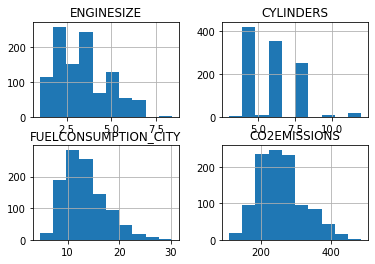

In [72]:
cdf.hist() #make a histogram of the DataFrame's columns
plt.show()

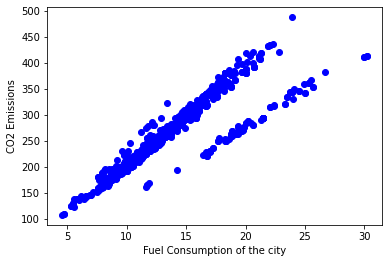

In [73]:
#Plot scater diagram of FUELCONSUMPTION_CITY vs CO2EMISSIONS
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption of the city')
plt.ylabel('CO2 Emissions')
plt.show()

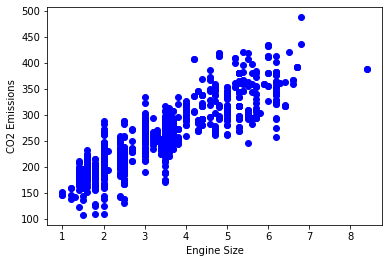

In [74]:
#Plot scatter diagram of ENGINESIZE vs CO2EMISSIONS
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

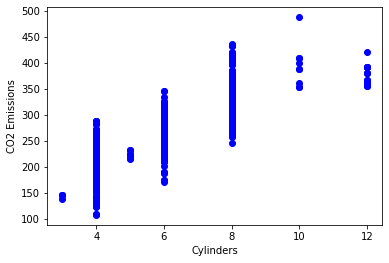

In [75]:
#Plot scatter diagram of CYLINDERS vs CO2EMISSIONS
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

## Creating train and test dataset

In [76]:
#Split data: Training: 80%, Testing: 20%
msk = np.random.rand(len(df)) < 0.8 #create a mask to select random rows
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model

#### Train with ENGINESIZE vs CO2EMISSIONS

Text(0, 0.5, 'CO2 Emissions')

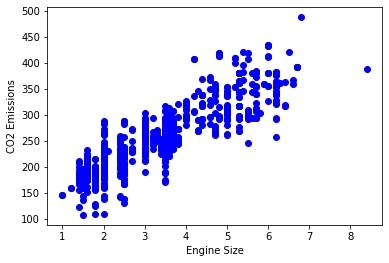

In [77]:
#Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

In [78]:
#Modeling Data
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
#The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[39.49051255]]
Intercept:  [124.15079859]


Text(0, 0.5, 'CO2 Emissions')

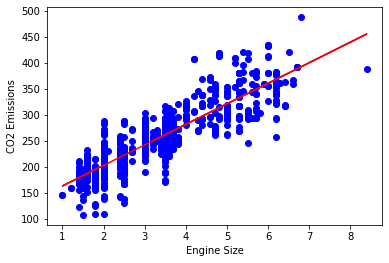

In [79]:
#Plot outputs
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.intercept_[0] + regr.coef_[0][0]*train_x, '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

In [80]:
#Calculating error values
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 22.09
Residual sum of squares (MSE): 834.65
R2-score: 0.79


#### Train with FUELCONSUMPTION_CITY vs CO2EMISSIONS

Text(0, 0.5, 'CO2 Emission')

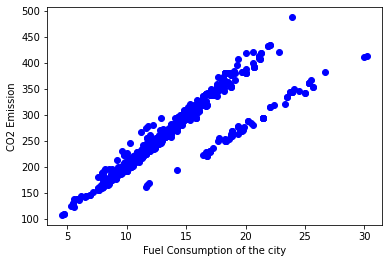

In [81]:
#Train data distribution
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption of the city')
plt.ylabel('CO2 Emission')

In [82]:
#For training dataset
train_x1 = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y1 = np.asanyarray(train[['CO2EMISSIONS']])

#train logistic regression model
regr1 = linear_model.LinearRegression()
regr1.fit(train_x1, train_y1)

#Find coefficient and intercept
coef = regr1.coef_
intercept = regr1.intercept_
print('Coefficient: ', coef)
print('Intercept: ', intercept)

Coefficient:  [[14.06026141]]
Intercept:  [69.5531728]


Text(0, 0.5, 'CO2 Emissions')

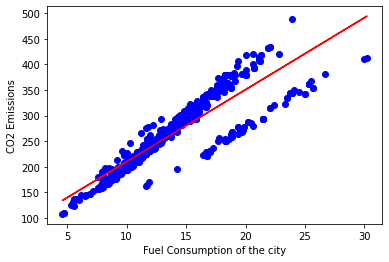

In [86]:
#Plot the outputs
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS, color='blue')
plt.plot(train_x1, intercept[0] + coef[0][0]*train_x1, '-r')
plt.xlabel('Fuel Consumption of the city')
plt.ylabel('CO2 Emissions')

In [84]:
#For testing dataset
test_x1 = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y1 = np.asanyarray(test[['CO2EMISSIONS']])

#Find the predictions aka yhat
test_y1_ = regr1.predict(test_x1)

#Calculate error values
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y1_ - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y1_ - test_y1)**2))
print("R2-score: %.2f" % r2_score(test_y1, test_y1_))

Mean absolute error: 19.49
Residual sum of squares (MSE): 832.83
R2-score: 0.79
